In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [6]:
batch_size = 32
epoch_size = 15
target_size = (256, 256)
directory = "..\\Datasets\\sachinkumar413\\Splitted_Dataset"

trainDatagen = ImageDataGenerator(rescale= 1/255.)
testDatagen = ImageDataGenerator(rescale= 1/255.)
validationDatagen = ImageDataGenerator(rescale= 1/255.)

train = trainDatagen.flow_from_directory(directory= f"{directory}/train", batch_size= batch_size, class_mode= 'categorical', target_size= target_size, shuffle= True)
test = testDatagen.flow_from_directory(directory= f"{directory}/test", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)
validation = validationDatagen.flow_from_directory(directory= f"{directory}/val", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)

Found 2200 images belonging to 5 classes.
Found 275 images belonging to 5 classes.
Found 275 images belonging to 5 classes.


In [7]:
Network = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

Network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 127, 127, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 32)    

In [8]:
Network.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = Network.fit(train, epochs= epoch_size, verbose= 'auto', validation_data= validation)

Epoch 1/15
69/69 [==============================] - 5s 65ms/step - loss: 1.3421 - accuracy: 0.5109 - val_loss: 1.7226 - val_accuracy: 0.3273
Epoch 2/15
69/69 [==============================] - 4s 56ms/step - loss: 1.0718 - accuracy: 0.6145 - val_loss: 2.2326 - val_accuracy: 0.1345
Epoch 3/15
69/69 [==============================] - 4s 56ms/step - loss: 1.0123 - accuracy: 0.6282 - val_loss: 1.7974 - val_accuracy: 0.3273
Epoch 4/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9813 - accuracy: 0.6441 - val_loss: 1.9072 - val_accuracy: 0.1855
Epoch 5/15
69/69 [==============================] - 4s 54ms/step - loss: 0.9377 - accuracy: 0.6573 - val_loss: 2.6273 - val_accuracy: 0.1345
Epoch 6/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9092 - accuracy: 0.6686 - val_loss: 1.8098 - val_accuracy: 0.3818
Epoch 7/15
69/69 [==============================] - 4s 55ms/step - loss: 0.8803 - accuracy: 0.6718 - val_loss: 2.1302 - val_accuracy: 0.2618
Epoch 8/15
69

In [9]:
test_generator_loss, test_generator_accuracy = Network.evaluate(test, steps=test.samples // batch_size)
print(f'test_generator Loss: {test_generator_loss}, test_generator Accuracy: {test_generator_accuracy}')

Network.evaluate(test)

8/8 [==============================] - 0s 50ms/step - loss: 1.0588 - accuracy: 0.6484
test_generator Loss: 1.0588059425354004, test_generator Accuracy: 0.6484375
9/9 [==============================] - 0s 47ms/step - loss: 1.1672 - accuracy: 0.6073


[1.1671521663665771, 0.607272744178772]

In [10]:
print("Training Loss: ", history.history['loss'][-1])
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])

Training Loss:  0.7501667737960815
Training Accuracy:  0.7131817936897278
Validation Loss:  1.0897680521011353
Validation Accuracy:  0.5745454430580139


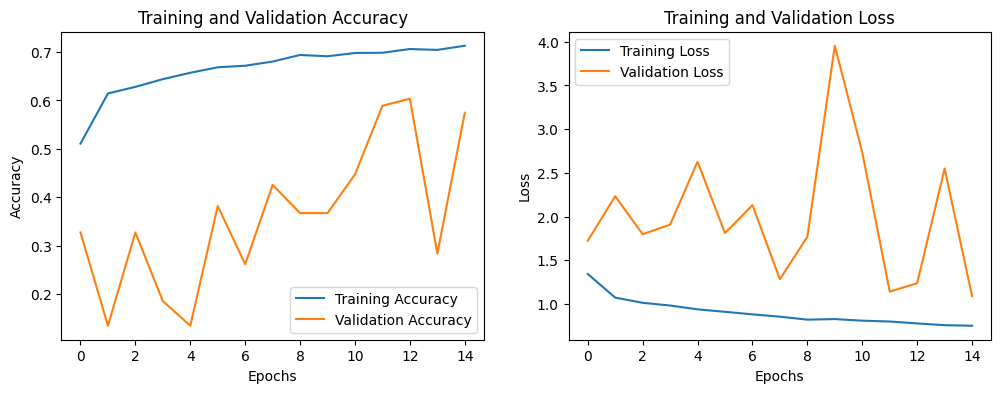

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')

plt.show()